In [70]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib.lines import Line2D

all_data_df =[]

In [71]:
#reading in the state abbreviations
path = '../keiko/statesAbbrev.csv'
statesAbbrev_df = pd.read_csv(path)
statesAbbrev_df.head(20)

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA
5,Colorado,Colo.,CO
6,Connecticut,Conn.,CT
7,Delaware,Del.,DE
8,District of Columbia,D.C.,DC
9,Florida,Fla.,FL


In [72]:
#list for state codes
state_codes = [x for x in statesAbbrev_df['Code']]

In [73]:
#list for state names
state_names = [x for x in statesAbbrev_df['State']]
len(state_names)

51

In [74]:
#creating a df dict to hold the state dfs, reading in the dfs
states_df_dict = {}
for x in range(10, 20):
    path = f'../keiko/states_data/US-{state_codes[x]}_cat_data.csv'
    states_df_dict[f'{state_codes[x]}_data_df'] = [pd.read_csv(path)]
states_df_dict

{'GA_data_df': [           time  arts_entertainment  autos  beauty_fitness  books_lit  \
  0    2019-01-06                  85     68              83         72   
  1    2019-01-13                  85     71              88         85   
  2    2019-01-20                  85     73              85         82   
  3    2019-01-27                  89     75              87         85   
  4    2019-02-03                  83     73              83         80   
  ..          ...                 ...    ...             ...        ...   
  98   2020-11-22                  77     70              78         53   
  99   2020-11-29                  79     75              84         66   
  100  2020-12-06                  84     75              88         67   
  101  2020-12-13                  83     76              83         65   
  102  2020-12-20                  87     74              89         53   
  
       action_adventure  campaigns_elections  celebs  discrimination  \
  0        

In [75]:
#inspecting the keys (ie df names)
states_df_dict.keys()

dict_keys(['GA_data_df', 'HI_data_df', 'ID_data_df', 'IL_data_df', 'IN_data_df', 'IA_data_df', 'KS_data_df', 'KY_data_df', 'LA_data_df', 'ME_data_df'])

In [76]:
col_names = list(states_df_dict[f'{state_codes[10]}_data_df'][0].columns)
len(col_names)

25

In [77]:
col_names_for_max = [x for x in col_names if x not in ['time', 'covid_cases', 'stay_at_home', 'mass_gathering_ban']]
len(col_names_for_max)

21

In [78]:
times_list = list(states_df_dict[f'{state_codes[10]}_data_df'][0]['time'])
len(times_list)

103

In [79]:
covid_cases = list(states_df_dict[f'{state_codes[12]}_data_df'][0]['covid_cases'])
len(covid_cases)

103

In [80]:
def tvfilm_graph_maker(ind_no):
    all_data_df = states_df_dict[f'{state_codes[ind_no]}_data_df'][0]
    data_2019_df = all_data_df.iloc[:52, :]
    data_2020_df = all_data_df.iloc[52:, :]
    
    graphs_time_list = [x[5:] for x in data_2020_df['time']]
    init_covid_list = [x for x in data_2020_df['covid_cases']]
    
    fig, ax = plt.subplots(figsize=(20,7))

    ax.plot(graphs_time_list, data_2020_df['action_adventure'], color='red', label='Action/Adventure')

    ax.plot(graphs_time_list, data_2020_df['scifi_fantasy'], color='orange', label='SciFi Fantasy')

    ax.plot(graphs_time_list, data_2020_df['tv_shows'], color='purple', label='TV Shows')

    ax.plot(graphs_time_list, data_2020_df['online_vids'], color='green', label='Online Video')

    plt.xticks(graphs_time_list, rotation=90)

    plt.xlabel('Date')
    plt.ylabel('Popularity (%)')
    plt.legend(loc='best')
    plt.title(f'{state_names[ind_no]}: Category Popularity in Group TV/Film vs Covid Cases, during 2020')

    ax2 = ax.twinx()
    colour_list = []
    for x in data_2020_df['stay_at_home']:
        if x == True:
            colour_list.append('green')
        else:
            colour_list.append('blue')
    ax2.set_ylabel('Covid Cases', color='blue')  
    ax2.bar(graphs_time_list, init_covid_list, color=colour_list, align='center', alpha=0.3)
    ax2.tick_params(axis='y', labelcolor='blue')
    
    custom_lines = [Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='blue', lw=4)]

    ax2.legend(custom_lines, ['Stay At Home in Effect', 'No Stay at Home'])
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    #fig.savefig(f'../keiko/analysis_visualisation/Graphs/Popularity_TVFilm/{state_names[ind_no]}.png') 
    plt.show()

In [68]:
#init_covid_list= states_df_dict[f'{state_codes[ind_no]}_data_df'][0]

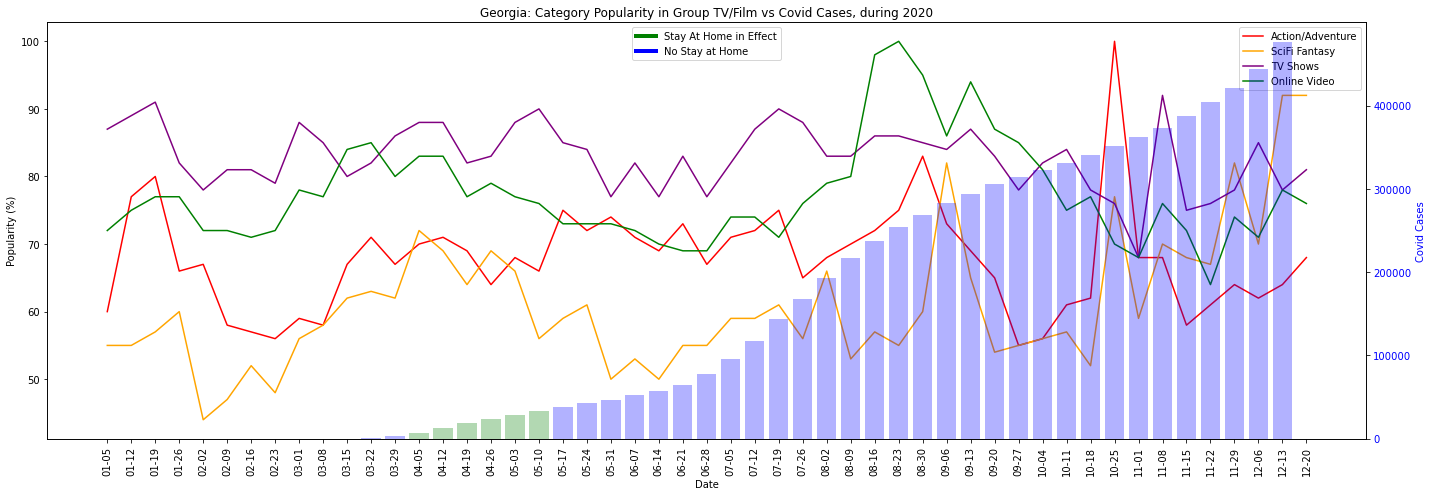

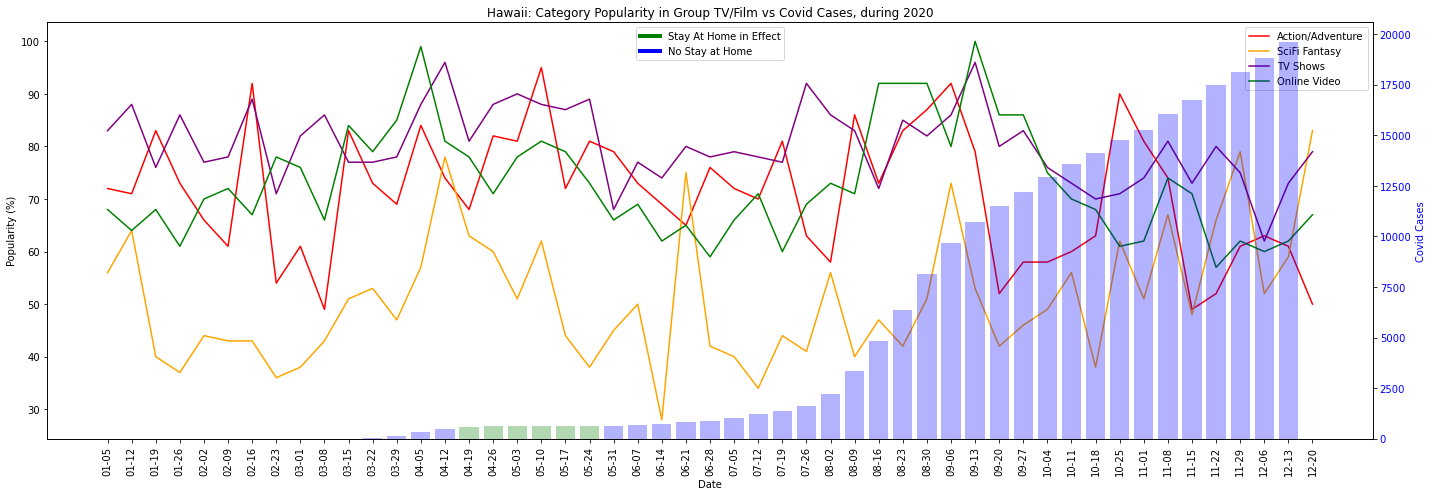

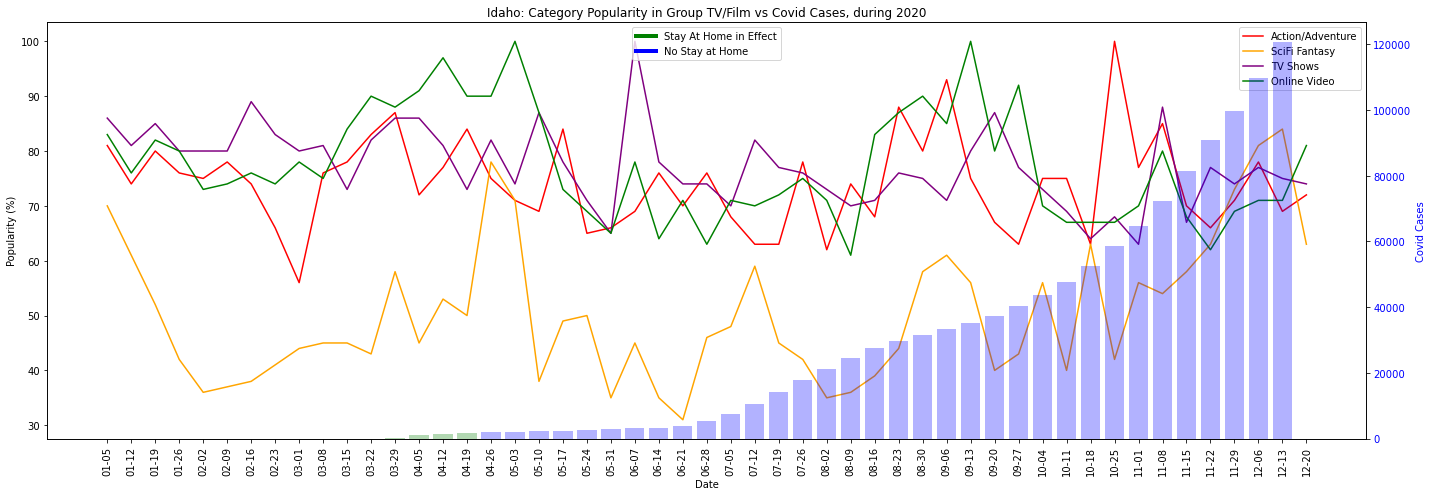

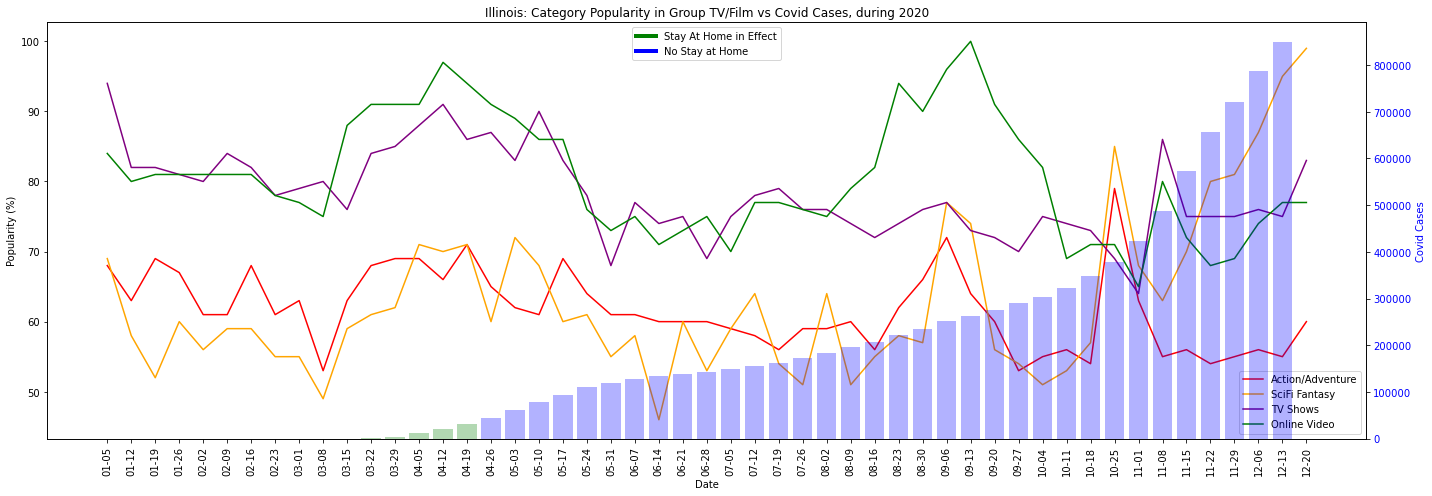

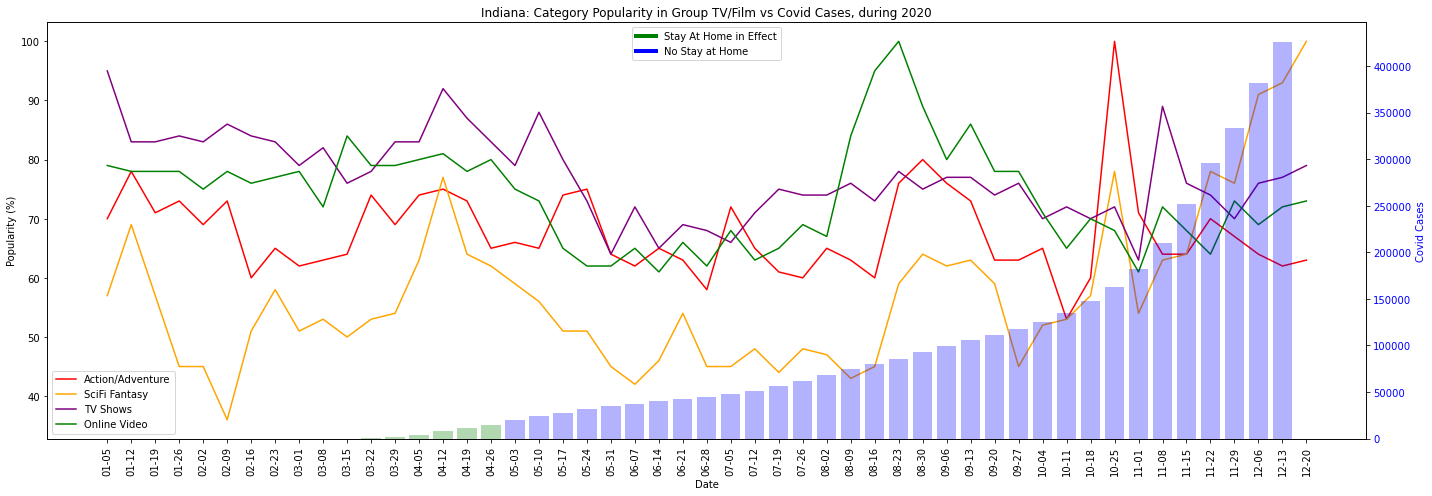

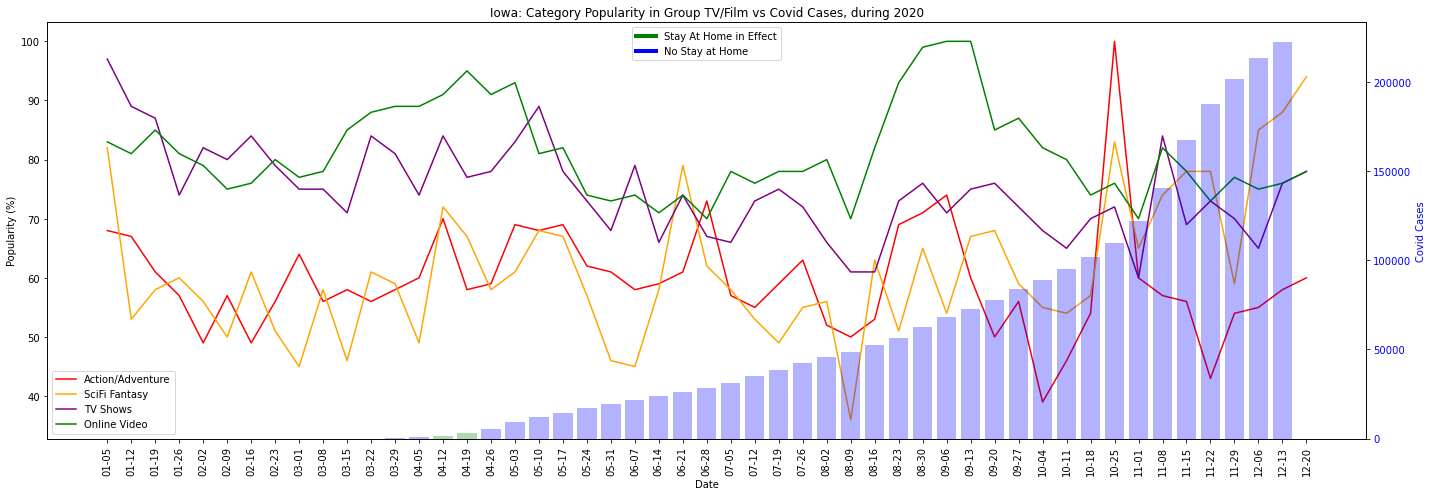

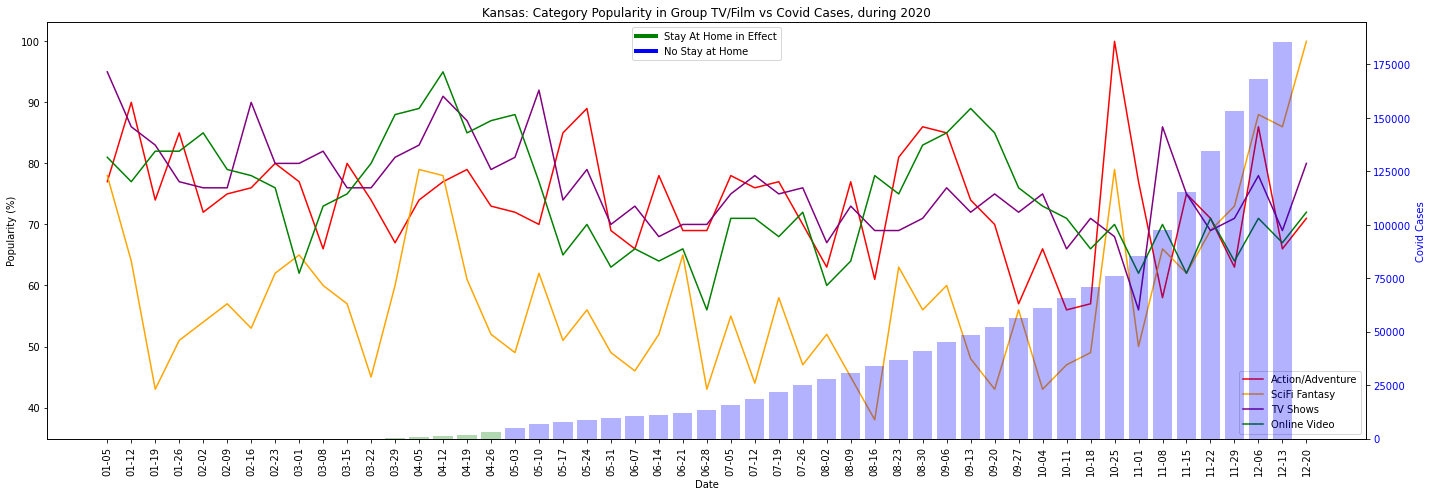

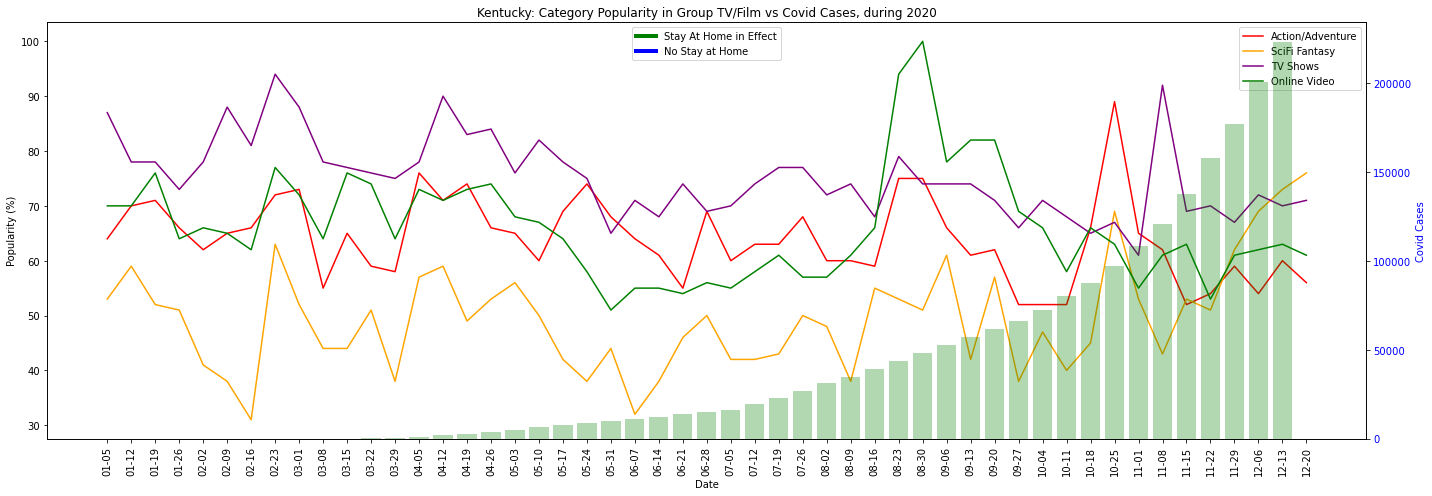

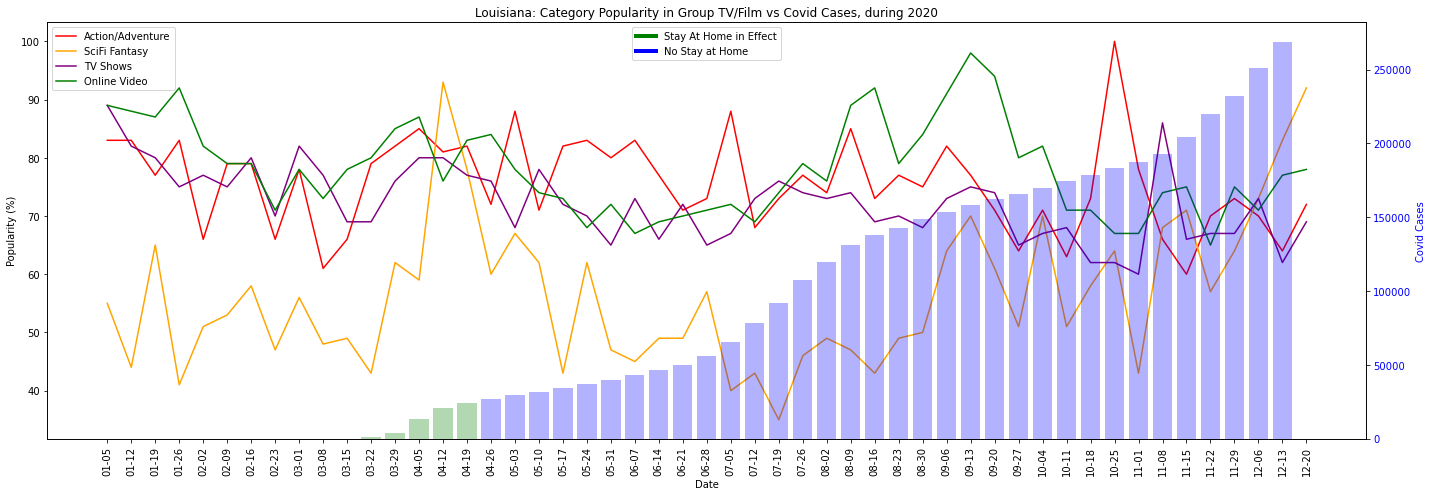

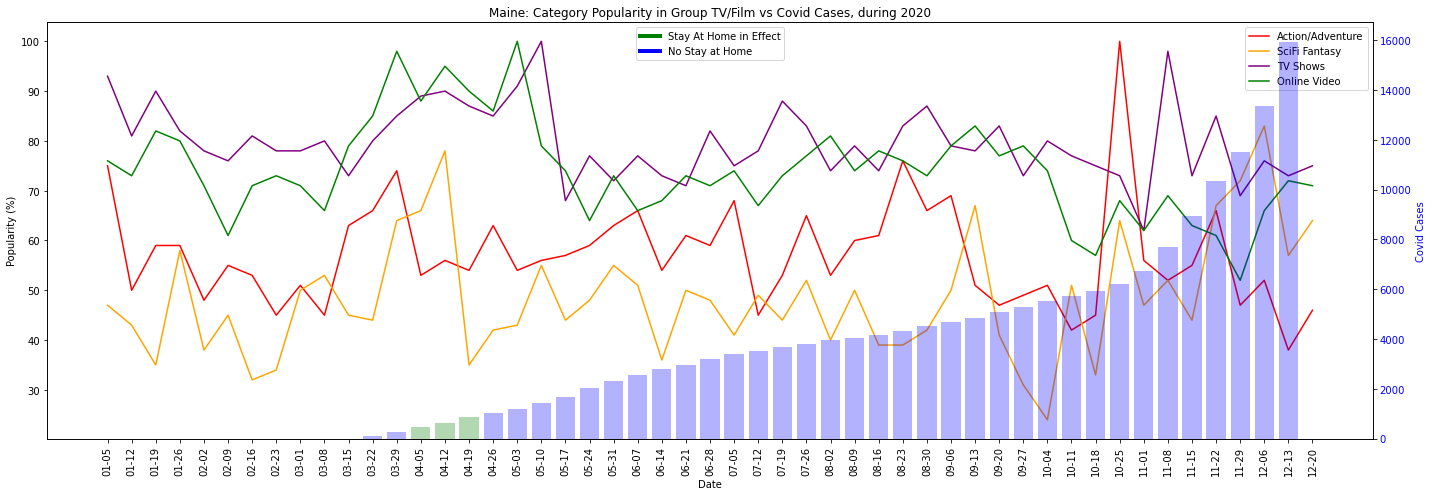

In [83]:
for x in range(10, 20):
    tvfilm_graph_maker(x)